In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
data = pd.read_csv(r'/content/shopping_behavior_updated.csv')
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
#Checking for missing values
data.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [5]:
#Checking data types of the columns
data.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


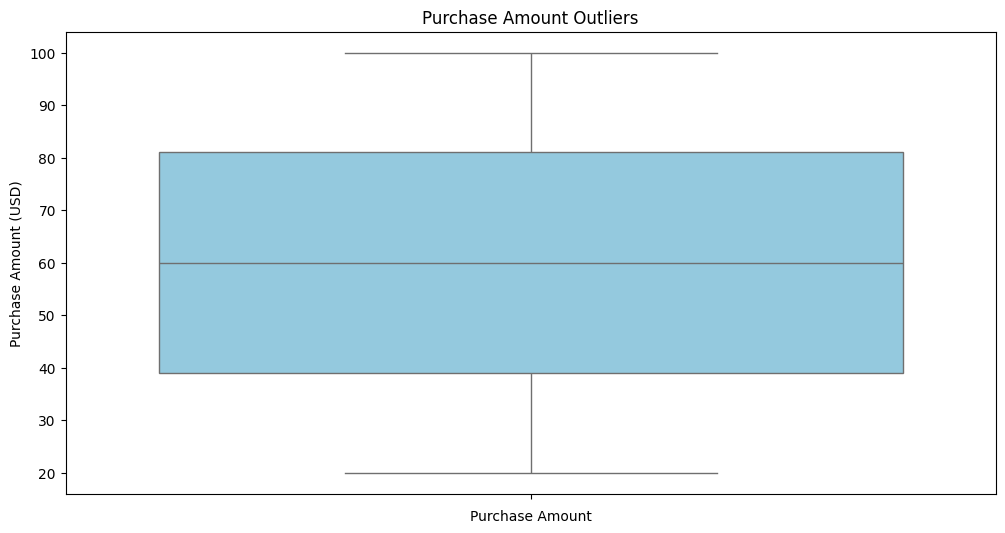

In [17]:
#Using Boxplot to view outliers in purchase amount
plt.figure(figsize= (12,6))
sns.boxplot(data['Purchase Amount (USD)'], color = 'skyblue')
plt.title('Purchase Amount Outliers')
plt.xlabel('Purchase Amount')
plt.show()

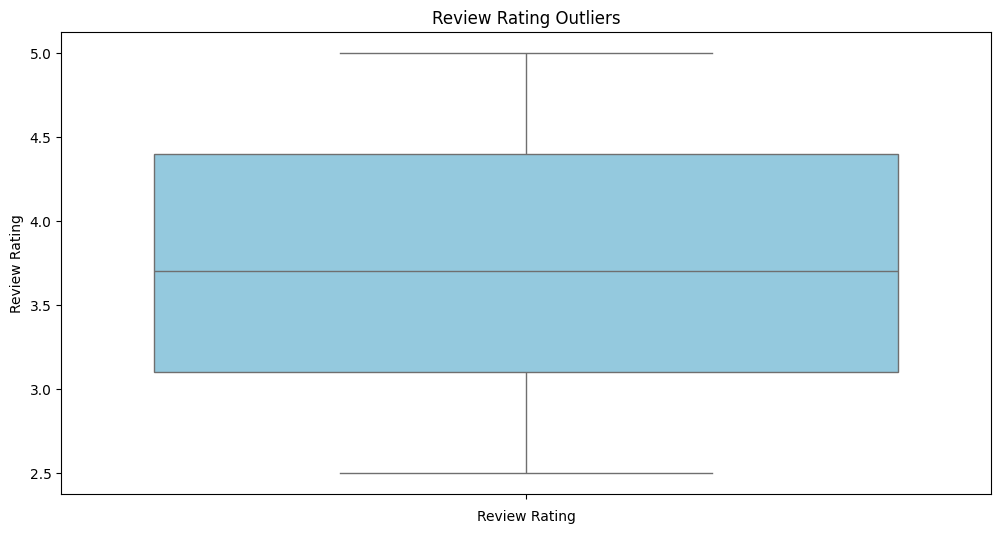

In [18]:
#Using Boxplot to view outliers in Review Rating
plt.figure(figsize= (12,6))
sns.boxplot(data['Review Rating'], color = 'skyblue')
plt.title('Review Rating Outliers')
plt.xlabel('Review Rating')
plt.show()

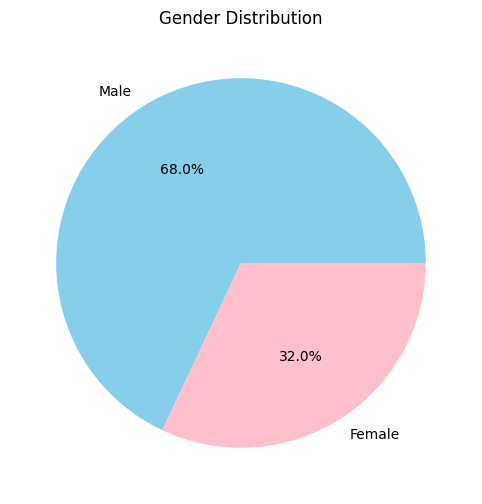

In [27]:
#EDA
#Viewing Gender Distribution
plt.figure(figsize = (12,6))
data['Gender'].value_counts().plot(kind = 'pie', autopct= '%1.1f%%', colors = ['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel ('')
plt.show()

In [21]:
# Items Purchased by Purchase Amount
items_by_pa = data.groupby(['Item Purchased'])['Purchase Amount (USD)'].sum(). sort_values(ascending=False)
items_by_pa

,Purchase Amount (USD)
Item Purchased,
Blouse,10410
Shirt,10332
Dress,10320
Pants,10090
Jewelry,10010
Sunglasses,9649
Belt,9635
Scarf,9561
Sweater,9462


<ipython-input-33-8fe846ee234d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = cat_by_pa.index, y = cat_by_pa.values,  palette= 'pastel')


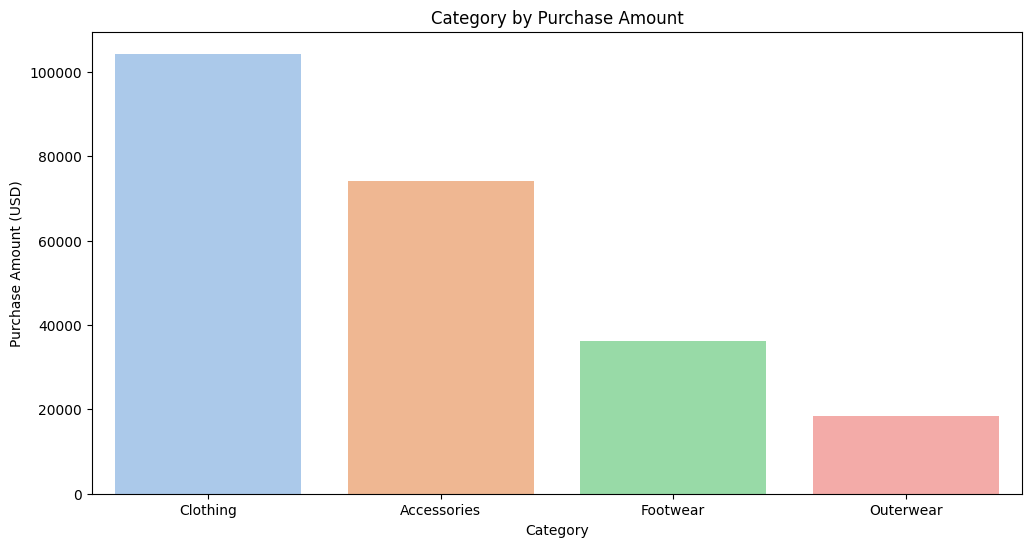

In [33]:
# Category distribution by purchase amount
plt.figure(figsize= (12,6))
cat_by_pa = data.groupby(['Category'])['Purchase Amount (USD)'].sum(). sort_values(ascending=False)
sns.barplot(x = cat_by_pa.index, y = cat_by_pa.values,  palette= 'pastel')
plt.title('Category by Purchase Amount')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.show()

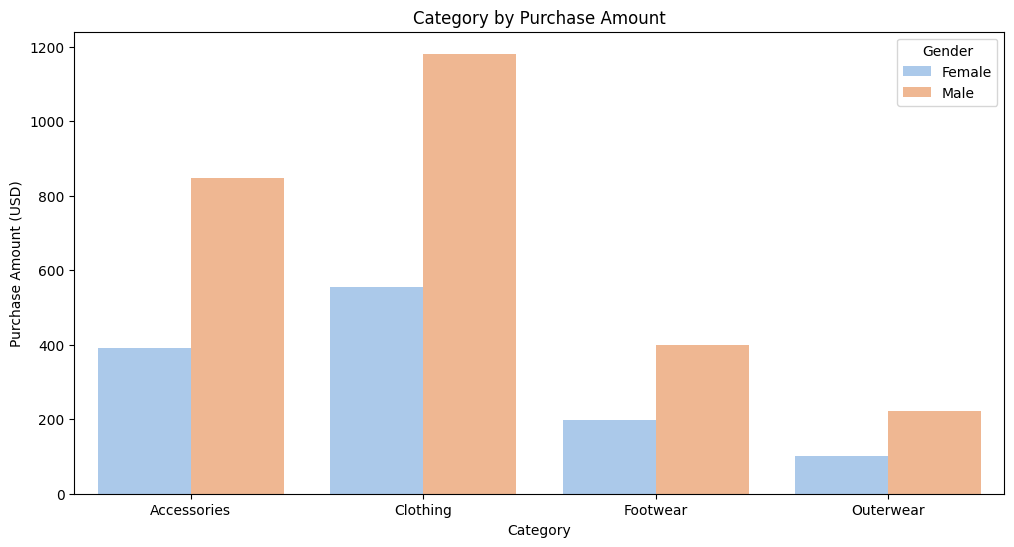

In [39]:
# Gender distribution by Category
plt.figure(figsize= (12,6))
gender_by_cat = data.groupby(['Gender', 'Category'])['Customer ID'].count().reset_index()
sns.barplot(x = 'Category', y = 'Customer ID', hue = 'Gender', data = gender_by_cat, palette= 'pastel')
plt.title('Category by Purchase Amount')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.show()

<ipython-input-41-85b18ef3f2fc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = season_by_pa.index, y = season_by_pa.values,  palette= 'pastel')


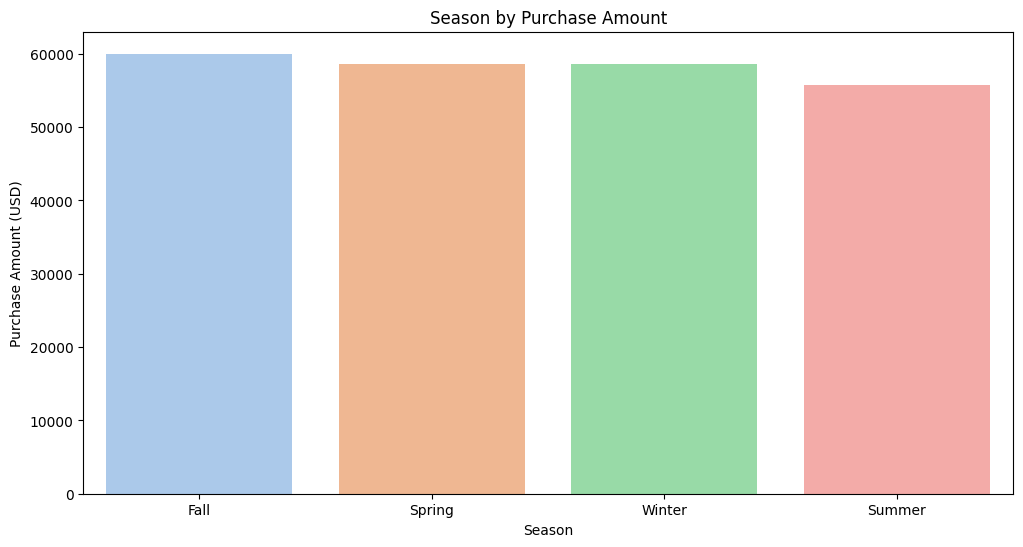

In [41]:
# Season with Most Purchases
plt.figure(figsize= (12,6))
season_by_pa = data.groupby(['Season'])['Purchase Amount (USD)'].sum(). sort_values(ascending=False)
sns.barplot(x = season_by_pa.index, y = season_by_pa.values,  palette= 'pastel')
plt.title('Season by Purchase Amount')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()

<ipython-input-45-ffb05303d89f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pm_pref.index, y = pm_pref.values,  palette= 'pastel')


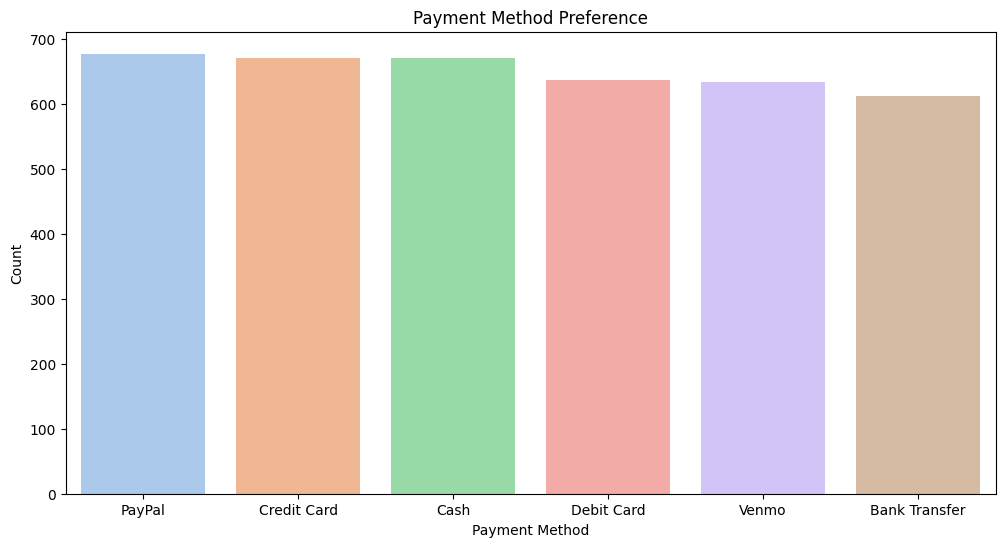

In [45]:
# Payment Method Preference
plt.figure(figsize= (12,6))
pm_pref = data.groupby(['Payment Method'])['Customer ID'].count(). sort_values(ascending=False)
sns.barplot(x = pm_pref.index, y = pm_pref.values,  palette= 'pastel')
plt.title('Payment Method Preference')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


<ipython-input-46-28112c27af6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = st_pref.index, y = st_pref.values,  palette= 'pastel')


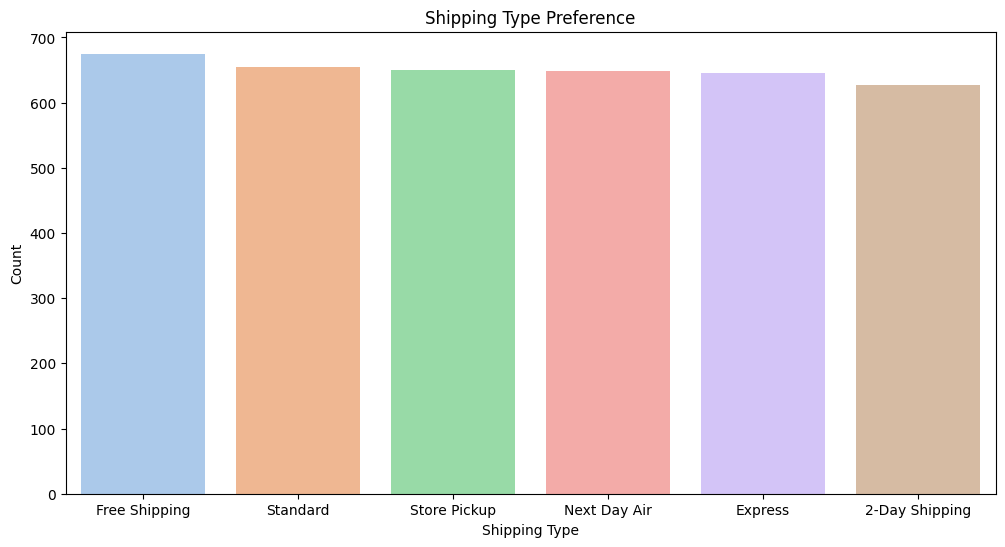

In [46]:
# Shipping Type Preference
plt.figure(figsize= (12,6))
st_pref = data.groupby(['Shipping Type'])['Customer ID'].count(). sort_values(ascending=False)
sns.barplot(x = st_pref.index, y = st_pref.values,  palette= 'pastel')
plt.title('Shipping Type Preference')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.show()


<ipython-input-51-822579622d74>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = promo_effect.index, y = promo_effect.values,  palette= 'pastel')


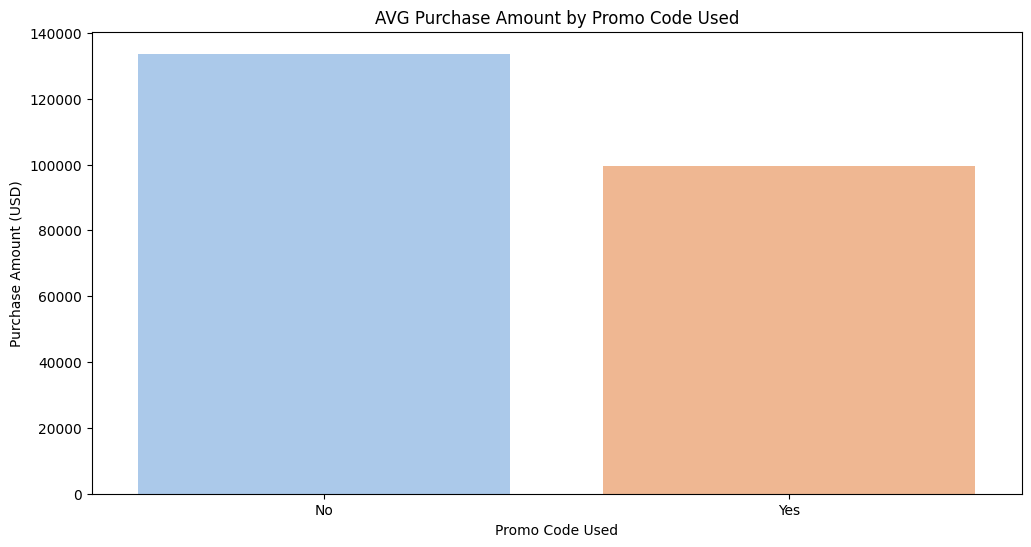

In [51]:
# Effect Of Promo Code Used on Purchase Amount
plt.figure(figsize= (12,6))
promo_effect = data.groupby(['Promo Code Used'])['Purchase Amount (USD)'].sum()
sns.barplot(x = promo_effect.index, y = promo_effect.values,  palette= 'pastel')
plt.title('AVG Purchase Amount by Promo Code Used')
plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Amount (USD)')
plt.show()

<ipython-input-52-22f519955d8e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sub_effect.index, y = sub_effect.values,  palette= 'pastel')


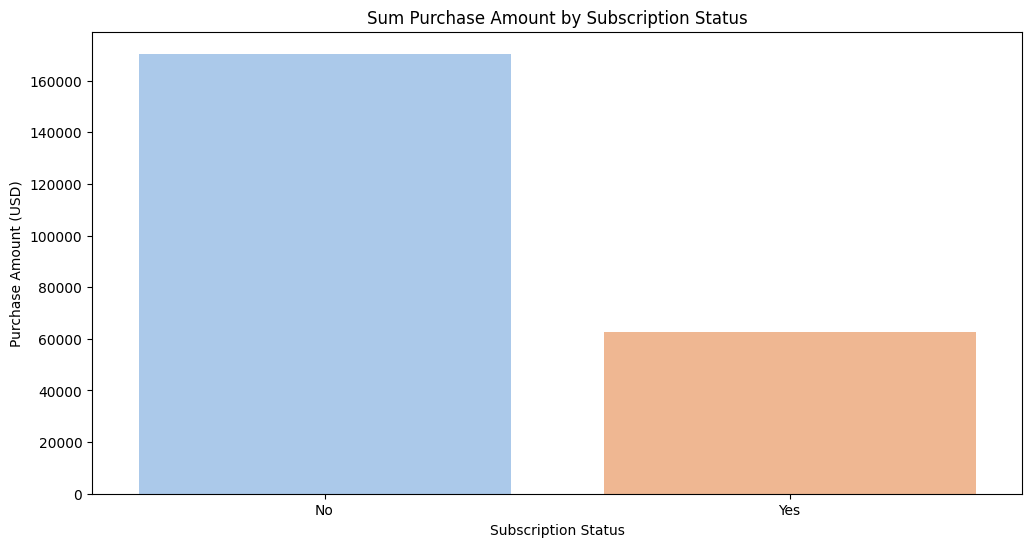

In [52]:
# Effect Of Subscription Status on Purchase Amount
plt.figure(figsize= (12,6))
sub_effect = data.groupby(['Subscription Status'])['Purchase Amount (USD)'].sum()
sns.barplot(x = sub_effect.index, y = sub_effect.values,  palette= 'pastel')
plt.title('Sum Purchase Amount by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.show()

<ipython-input-56-9c010006c849>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sub_effect_pp.index, y = sub_effect_pp.values,  palette= 'pastel')


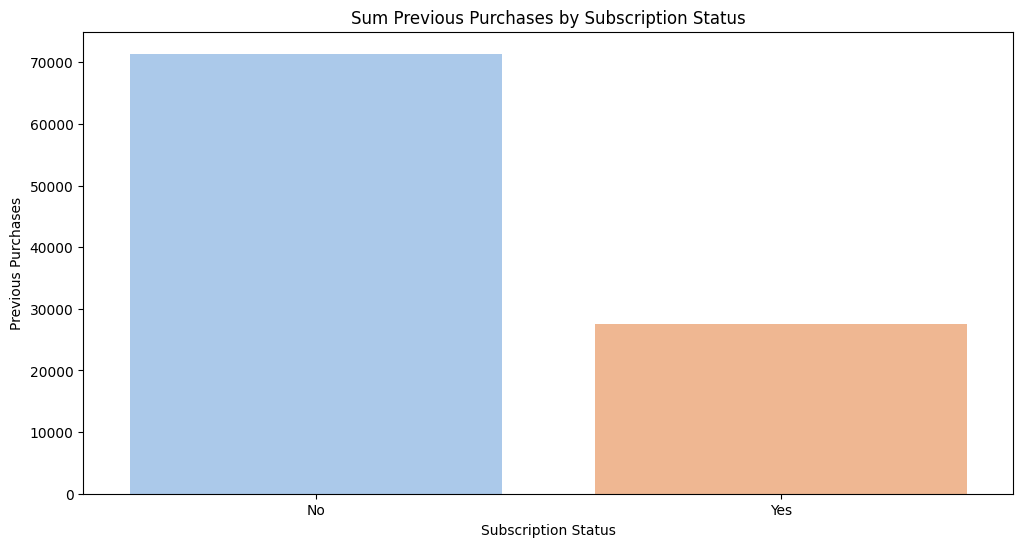

In [56]:
# Effect Of Subscription Status on Previous Purchases
plt.figure(figsize= (12,6))
sub_effect_pp = data.groupby(['Subscription Status'])['Previous Purchases'].sum()
sns.barplot(x = sub_effect_pp.index, y = sub_effect_pp.values,  palette= 'pastel')
plt.title('Sum Previous Purchases by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Previous Purchases')
plt.show()

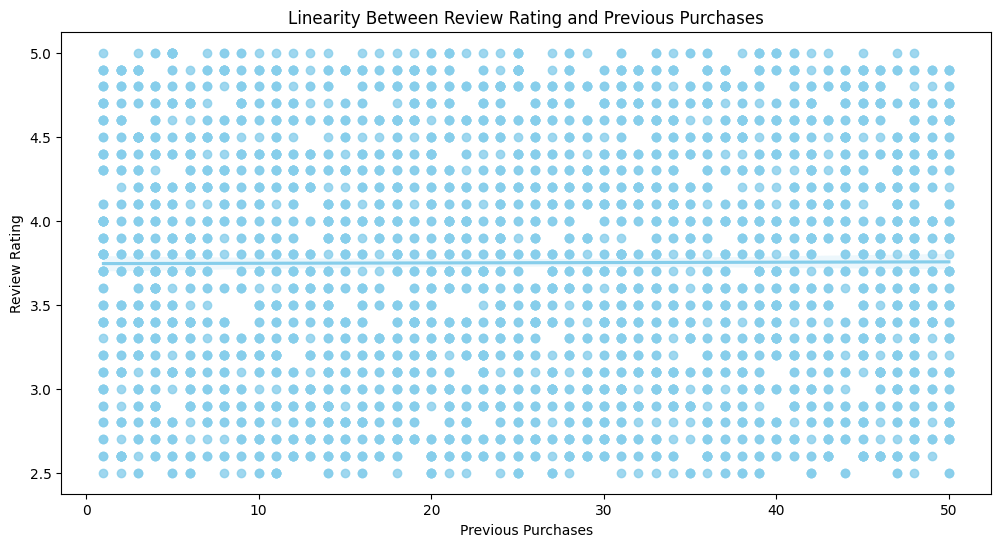

In [59]:
#Correlation Analysis
#Viewing the Linearity between Review ating and Previuous Purcahses
plt.figure(figsize= (12,6))
sns.regplot(x = data['Previous Purchases'], y = data['Review Rating'], color = 'skyblue')
plt.title('Linearity Between Review Rating and Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Review Rating')
plt.show()

#From the Regplot, we can see that there's no linearity between the review rating and the customers' previous purchases.
#The satisfaction does not affect the number of purchases.

In [70]:
#Category Preference By Location
location_by_pa = data.groupby(['Location'])['Purchase Amount (USD)'].sum().sort_values(ascending = False)
location_by_pa.head(5)

,Purchase Amount (USD)
Location,
Montana,5784
Illinois,5617
California,5605
Idaho,5587
Nevada,5514


In [72]:
#Pivot table for Dhipping type and Season
category_by_season_pivot = data.pivot_table(
    values = 'Purchase Amount (USD)',
    index = 'Season',
    columns = 'Category',
    aggfunc = 'count')
category_by_season_pivot

Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,324,427,136,88
Spring,301,454,163,81
Summer,312,408,160,75
Winter,303,448,140,80


In [76]:
# Segmenting based on Purchase Amount
spending_habit = pd.qcut(data['Purchase Amount (USD)'], q = 3, labels = ['Low Spender', 'Medium Spender', 'High Spender'])

data['Spending Habit'] = spending_habit
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Spending Habit
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Medium Spender
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Medium Spender
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Medium Spender
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,High Spender
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Medium Spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Low Spender
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Medium Spender
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Low Spender
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,High Spender
